<a href="https://colab.research.google.com/github/ArthAgrawal/Audio-Forensics-Research/blob/main/Audio_Forensics_ASVDataset_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

spoof_folder = '/content/drive/MyDrive/LA_Dataset_Final/Bonafide3'

os.makedirs(spoof_folder, exist_ok=True)

print(f"Folder '{spoof_folder}' has been created.")

Folder '/content/drive/MyDrive/LA_Dataset_Final/Bonafide3' has been created.


In [ ]:
import os

spoof_folder = '/content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06'

os.makedirs(spoof_folder, exist_ok=True)

print(f"Folder '{spoof_folder}' has been created.")

Folder '/content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06' has been created.


In [ ]:
import os
import shutil
from tqdm import tqdm

# Paths
flac_dir = '/content/drive/MyDrive/LA_Dataset_Final/LA/ASVspoof2019_LA_train/flac'
label_file = '/content/drive/MyDrive/LA_Dataset_Final/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'
bonafide_dir = '/content/drive/MyDrive/LA_Dataset_Final/Bonafide3'
spoof_base_dir = '/content/drive/MyDrive/LA_Dataset_Final/Spoof3'

# Get all files in the FLAC directory
flac_files = [f for f in os.listdir(flac_dir) if f.endswith('.flac')]

# Process the first 1000 files
batch_start = 0
batch_size = 1000
batch = flac_files[batch_start:batch_start + batch_size]

print(f"Processing files {batch_start + 1} to {batch_start + len(batch)}")

for flac_file in tqdm(batch, desc="Processing"):
    file_prefix = flac_file.split('.')[0]  # Extract part before '.flac'

    # Open the label file and check if the file prefix is in any line
    with open(label_file, 'r') as f:
        lines = f.readlines()
        for index, line in enumerate(lines):
            if file_prefix in line:
                cleaned_line = line.strip().replace(" ", "")
                print(f"File {flac_file} found in line {index + 1}: {cleaned_line}")

                if 'bonafide' in cleaned_line:
                    print(f"'bonafide' found in line {index + 1}")
                    source_path = os.path.join(flac_dir, flac_file)
                    destination_path = os.path.join(bonafide_dir, flac_file)
                    shutil.move(source_path, destination_path)
                    print(f"Moved {flac_file} to {bonafide_dir}")
                elif 'spoof' in cleaned_line:
                    print(f"'spoof' found in line {index + 1}")
                    for i in range(1, 9):
                        key = f'A0{i}'
                        if key in cleaned_line:
                            print(f"spoof-{key}")
                            spoof_dir = os.path.join(spoof_base_dir, key)
                            os.makedirs(spoof_dir, exist_ok=True)
                            source_path = os.path.join(flac_dir, flac_file)
                            destination_path = os.path.join(spoof_dir, flac_file)
                            shutil.move(source_path, destination_path)
                            print(f"Moved {flac_file} to {spoof_dir}")
                            break


Processing files 1 to 1000


Processing:   1%|          | 7/1000 [00:00<00:14, 69.45it/s]

File LA_T_7039637.flac found in line 6131: LA_0097LA_T_7039637-A01spoof
'spoof' found in line 6131
spoof-A01
Moved LA_T_7039637.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_4483744.flac found in line 21469: LA_0098LA_T_4483744-A05spoof
'spoof' found in line 21469
spoof-A05
Moved LA_T_4483744.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_3454900.flac found in line 6622: LA_0080LA_T_3454900-A02spoof
'spoof' found in line 6622
spoof-A02
Moved LA_T_3454900.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_4314646.flac found in line 23157: LA_0087LA_T_4314646-A06spoof
'spoof' found in line 23157
spoof-A06
Moved LA_T_4314646.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_3814066.flac found in line 14793: LA_0083LA_T_3814066-A04spoof
'spoof' found in line 14793
spoof-A04
Moved LA_T_3814066.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_6832495.flac found in line 19415: LA_0087LA_T_683

Processing:   2%|▏         | 16/1000 [00:00<00:13, 73.47it/s]

Moved LA_T_7566003.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_5526945.flac found in line 18062: LA_0080LA_T_5526945-A05spoof
'spoof' found in line 18062
spoof-A05
Moved LA_T_5526945.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05


Processing:   3%|▎         | 26/1000 [00:00<00:11, 83.83it/s]

File LA_T_6443987.flac found in line 21128: LA_0096LA_T_6443987-A05spoof
'spoof' found in line 21128
spoof-A05
Moved LA_T_6443987.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_4160149.flac found in line 938: LA_0086LA_T_4160149--bonafide
'bonafide' found in line 938
Moved LA_T_4160149.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_9342529.flac found in line 7694: LA_0085LA_T_9342529-A02spoof
'spoof' found in line 7694
spoof-A02
Moved LA_T_9342529.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_4033649.flac found in line 20106: LA_0091LA_T_4033649-A05spoof
'spoof' found in line 20106
spoof-A05
Moved LA_T_4033649.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_2166656.flac found in line 4483: LA_0089LA_T_2166656-A01spoof
'spoof' found in line 4483
spoof-A01
Moved LA_T_2166656.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_1306139.flac found in line 20050: LA_0091LA_T_1306139-A05spo

Processing:   4%|▎         | 37/1000 [00:00<00:10, 91.85it/s]

File LA_T_6126488.flac found in line 1479: LA_0090LA_T_6126488--bonafide
'bonafide' found in line 1479
Moved LA_T_6126488.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_8790533.flac found in line 5787: LA_0095LA_T_8790533-A01spoof
'spoof' found in line 5787
spoof-A01
Moved LA_T_8790533.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01


Processing:   5%|▍         | 47/1000 [00:00<00:10, 88.89it/s]

File LA_T_4134344.flac found in line 7952: LA_0087LA_T_4134344-A02spoof
'spoof' found in line 7952
spoof-A02
Moved LA_T_4134344.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_7147999.flac found in line 9743: LA_0096LA_T_7147999-A02spoof
'spoof' found in line 9743
spoof-A02
Moved LA_T_7147999.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_7424811.flac found in line 4031: LA_0086LA_T_7424811-A01spoof
'spoof' found in line 4031
spoof-A01
Moved LA_T_7424811.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_1119401.flac found in line 13613: LA_0097LA_T_1119401-A03spoof
'spoof' found in line 13613
spoof-A03
Moved LA_T_1119401.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_3194494.flac found in line 18198: LA_0081LA_T_3194494-A05spoof
'spoof' found in line 18198
spoof-A05
Moved LA_T_3194494.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_2231672.flac found in line 19878: LA_0090LA_T_22316

Processing:   7%|▋         | 67/1000 [00:00<00:09, 93.95it/s]

File LA_T_6379311.flac found in line 17520: LA_0097LA_T_6379311-A04spoof
'spoof' found in line 17520
spoof-A04
Moved LA_T_6379311.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_5238376.flac found in line 13103: LA_0094LA_T_5238376-A03spoof
'spoof' found in line 13103
spoof-A03
Moved LA_T_5238376.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_3100997.flac found in line 927: LA_0086LA_T_3100997--bonafide
'bonafide' found in line 927
Moved LA_T_3100997.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_1721131.flac found in line 8476: LA_0090LA_T_1721131-A02spoof
'spoof' found in line 8476
spoof-A02
Moved LA_T_1721131.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_1037774.flac found in line 20621: LA_0094LA_T_1037774-A05spoof
'spoof' found in line 20621
spoof-A05
Moved LA_T_1037774.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_8657799.flac found in line 18319: LA_0081LA_T_8657799-A05s

Processing:   9%|▊         | 87/1000 [00:00<00:09, 92.11it/s]

Moved LA_T_9710071.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_7671286.flac found in line 6522: LA_0079LA_T_7671286-A02spoof
'spoof' found in line 6522
spoof-A02
Moved LA_T_7671286.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_6943821.flac found in line 21326: LA_0097LA_T_6943821-A05spoof
'spoof' found in line 21326
spoof-A05
Moved LA_T_6943821.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_5706682.flac found in line 23005: LA_0086LA_T_5706682-A06spoof
'spoof' found in line 23005
spoof-A06
Moved LA_T_5706682.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_9494832.flac found in line 24796: LA_0095LA_T_9494832-A06spoof
'spoof' found in line 24796
spoof-A06
Moved LA_T_9494832.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_8108449.flac found in line 4230: LA_0087LA_T_8108449-A01spoof
'spoof' found in line 4230
spoof-A01
Moved LA_T_8108449.flac to /content/drive/MyDrive/LA_Datase

Processing:  11%|█         | 107/1000 [00:01<00:09, 91.82it/s]

Moved LA_T_3586382.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_3747046.flac found in line 1197: LA_0088LA_T_3747046--bonafide
'bonafide' found in line 1197
Moved LA_T_3747046.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_6577656.flac found in line 9920: LA_0097LA_T_6577656-A02spoof
'spoof' found in line 9920
spoof-A02
Moved LA_T_6577656.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_7110907.flac found in line 12957: LA_0093LA_T_7110907-A03spoof
'spoof' found in line 12957
spoof-A03
Moved LA_T_7110907.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_2820654.flac found in line 3570: LA_0084LA_T_2820654-A01spoof
'spoof' found in line 3570
spoof-A01
Moved LA_T_2820654.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_7399947.flac found in line 13158: LA_0094LA_T_7399947-A03spoof
'spoof' found in line 13158
spoof-A03
Moved LA_T_7399947.flac to /content/drive/MyDrive/LA_Dataset_Final/S

Processing:  13%|█▎        | 128/1000 [00:01<00:09, 93.18it/s]

Moved LA_T_5118111.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_7802899.flac found in line 9948: LA_0097LA_T_7802899-A02spoof
'spoof' found in line 9948
spoof-A02
Moved LA_T_7802899.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_5191266.flac found in line 7973: LA_0087LA_T_5191266-A02spoof
'spoof' found in line 7973
spoof-A02
Moved LA_T_5191266.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_3538502.flac found in line 1059: LA_0087LA_T_3538502--bonafide
'bonafide' found in line 1059
Moved LA_T_3538502.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_8497562.flac found in line 16980: LA_0094LA_T_8497562-A04spoof
'spoof' found in line 16980
spoof-A04
Moved LA_T_8497562.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_6519634.flac found in line 20932: LA_0095LA_T_6519634-A05spoof
'spoof' found in line 20932
spoof-A05
Moved LA_T_6519634.flac to /content/drive/MyDrive/LA_Dataset_Final/S

Processing:  15%|█▍        | 149/1000 [00:01<00:08, 97.41it/s]

File LA_T_4650956.flac found in line 20509: LA_0093LA_T_4650956-A05spoof
'spoof' found in line 20509
spoof-A05
Moved LA_T_4650956.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_8752587.flac found in line 20987: LA_0095LA_T_8752587-A05spoof
'spoof' found in line 20987
spoof-A05
Moved LA_T_8752587.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_9223860.flac found in line 16809: LA_0093LA_T_9223860-A04spoof
'spoof' found in line 16809
spoof-A04
Moved LA_T_9223860.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_7125464.flac found in line 15054: LA_0084LA_T_7125464-A04spoof
'spoof' found in line 15054
spoof-A04
Moved LA_T_7125464.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_1490411.flac found in line 12272: LA_0090LA_T_1490411-A03spoof
'spoof' found in line 12272
spoof-A03
Moved LA_T_1490411.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_2429873.flac found in line 11353: LA_0085LA_T

Processing:  17%|█▋        | 170/1000 [00:01<00:08, 96.97it/s]

File LA_T_2449337.flac found in line 21988: LA_0081LA_T_2449337-A06spoof
'spoof' found in line 21988
spoof-A06
Moved LA_T_2449337.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_4275060.flac found in line 22025: LA_0081LA_T_4275060-A06spoof
'spoof' found in line 22025
spoof-A06
Moved LA_T_4275060.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_8239480.flac found in line 4994: LA_0091LA_T_8239480-A01spoof
'spoof' found in line 4994
spoof-A01
Moved LA_T_8239480.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_8010120.flac found in line 11265: LA_0084LA_T_8010120-A03spoof
'spoof' found in line 11265
spoof-A03
Moved LA_T_8010120.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_4754661.flac found in line 9701: LA_0096LA_T_4754661-A02spoof
'spoof' found in line 9701
spoof-A02
Moved LA_T_4754661.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_9964017.flac found in line 1930: LA_0093LA_T_9964

Processing:  18%|█▊        | 180/1000 [00:01<00:08, 92.78it/s]

File LA_T_3650320.flac found in line 11551: LA_0086LA_T_3650320-A03spoof
'spoof' found in line 11551
spoof-A03
Moved LA_T_3650320.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_6362766.flac found in line 588: LA_0083LA_T_6362766--bonafide
'bonafide' found in line 588
Moved LA_T_6362766.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_2129493.flac found in line 8279: LA_0089LA_T_2129493-A02spoof
'spoof' found in line 8279
spoof-A02
Moved LA_T_2129493.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_3137426.flac found in line 11738: LA_0087LA_T_3137426-A03spoof
'spoof' found in line 11738
spoof-A03
Moved LA_T_3137426.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_5081942.flac found in line 18058: LA_0080LA_T_5081942-A05spoof
'spoof' found in line 18058
spoof-A05
Moved LA_T_5081942.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_2942961.flac found in line 23314: LA_0088LA_T_2942961-A06s

Processing:  19%|█▉        | 191/1000 [00:02<00:08, 95.14it/s]

File LA_T_5420024.flac found in line 2521: LA_0098LA_T_5420024--bonafide
'bonafide' found in line 2521
Moved LA_T_5420024.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_9919874.flac found in line 1928: LA_0093LA_T_9919874--bonafide
'bonafide' found in line 1928
Moved LA_T_9919874.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3


Processing:  20%|██        | 202/1000 [00:02<00:08, 97.16it/s]

File LA_T_7487909.flac found in line 20367: LA_0092LA_T_7487909-A05spoof
'spoof' found in line 20367
spoof-A05
Moved LA_T_7487909.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_9952125.flac found in line 7134: LA_0082LA_T_9952125-A02spoof
'spoof' found in line 7134
spoof-A02
Moved LA_T_9952125.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_7581746.flac found in line 20374: LA_0092LA_T_7581746-A05spoof
'spoof' found in line 20374
spoof-A05
Moved LA_T_7581746.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_8233824.flac found in line 3679: LA_0084LA_T_8233824-A01spoof
'spoof' found in line 3679
spoof-A01
Moved LA_T_8233824.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_5560108.flac found in line 7986: LA_0087LA_T_5560108-A02spoof
'spoof' found in line 7986
spoof-A02
Moved LA_T_5560108.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_3247321.flac found in line 17832: LA_0079LA_T_32473

Processing:  21%|██        | 212/1000 [00:02<00:08, 92.84it/s]

File LA_T_6420457.flac found in line 24338: LA_0093LA_T_6420457-A06spoof
'spoof' found in line 24338
spoof-A06
Moved LA_T_6420457.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_7905301.flac found in line 22670: LA_0084LA_T_7905301-A06spoof
'spoof' found in line 22670
spoof-A06
Moved LA_T_7905301.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06


Processing:  22%|██▏       | 223/1000 [00:02<00:08, 96.29it/s]

File LA_T_5330166.flac found in line 14834: LA_0083LA_T_5330166-A04spoof
'spoof' found in line 14834
spoof-A04
Moved LA_T_5330166.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_7725351.flac found in line 17734: LA_0098LA_T_7725351-A04spoof
'spoof' found in line 17734
spoof-A04
Moved LA_T_7725351.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_1402346.flac found in line 12270: LA_0090LA_T_1402346-A03spoof
'spoof' found in line 12270
spoof-A03
Moved LA_T_1402346.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_4600077.flac found in line 21663: LA_0079LA_T_4600077-A06spoof
'spoof' found in line 21663
spoof-A06
Moved LA_T_4600077.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_7001035.flac found in line 11818: LA_0087LA_T_7001035-A03spoof
'spoof' found in line 11818
spoof-A03
Moved LA_T_7001035.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_7805433.flac found in line 25154: LA_0097LA_T

Processing:  24%|██▍       | 243/1000 [00:02<00:07, 94.69it/s]

Moved LA_T_9056092.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_6713698.flac found in line 8201: LA_0088LA_T_6713698-A02spoof
'spoof' found in line 8201
spoof-A02
Moved LA_T_6713698.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_1055109.flac found in line 5620: LA_0095LA_T_1055109-A01spoof
'spoof' found in line 5620
spoof-A01
Moved LA_T_1055109.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_6051680.flac found in line 7997: LA_0087LA_T_6051680-A02spoof
'spoof' found in line 7997
spoof-A02
Moved LA_T_6051680.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_2092774.flac found in line 8855: LA_0092LA_T_2092774-A02spoof
'spoof' found in line 8855
spoof-A02
Moved LA_T_2092774.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_5090980.flac found in line 18439: LA_0082LA_T_5090980-A05spoof
'spoof' found in line 18439
spoof-A05
Moved LA_T_5090980.flac to /content/drive/MyDrive/LA_Dataset_Fi

Processing:  26%|██▋       | 264/1000 [00:02<00:07, 94.26it/s]

File LA_T_7391835.flac found in line 9937: LA_0097LA_T_7391835-A02spoof
'spoof' found in line 9937
spoof-A02
Moved LA_T_7391835.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_3547633.flac found in line 15358: LA_0086LA_T_3547633-A04spoof
'spoof' found in line 15358
spoof-A04
Moved LA_T_3547633.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_2925763.flac found in line 406: LA_0082LA_T_2925763--bonafide
'bonafide' found in line 406
Moved LA_T_2925763.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_1380103.flac found in line 5816: LA_0096LA_T_1380103-A01spoof
'spoof' found in line 5816
spoof-A01
Moved LA_T_1380103.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_4049404.flac found in line 19167: LA_0086LA_T_4049404-A05spoof
'spoof' found in line 19167
spoof-A05
Moved LA_T_4049404.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_4743262.flac found in line 3970: LA_0086LA_T_4743262-A01spoo

Processing:  29%|██▊       | 286/1000 [00:03<00:07, 98.43it/s]

Moved LA_T_7366018.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_6854881.flac found in line 7641: LA_0085LA_T_6854881-A02spoof
'spoof' found in line 7641
spoof-A02
Moved LA_T_6854881.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_8317825.flac found in line 3499: LA_0083LA_T_8317825-A01spoof
'spoof' found in line 3499
spoof-A01
Moved LA_T_8317825.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_8007489.flac found in line 746: LA_0084LA_T_8007489--bonafide
'bonafide' found in line 746
Moved LA_T_8007489.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_1830509.flac found in line 392: LA_0082LA_T_1830509--bonafide
'bonafide' found in line 392
Moved LA_T_1830509.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_3736851.flac found in line 9473: LA_0095LA_T_3736851-A02spoof
'spoof' found in line 9473
spoof-A02
Moved LA_T_3736851.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File 

Processing:  31%|███       | 306/1000 [00:03<00:07, 95.30it/s]

Moved LA_T_6376119.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_5426666.flac found in line 14650: LA_0082LA_T_5426666-A04spoof
'spoof' found in line 14650
spoof-A04
Moved LA_T_5426666.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_8937718.flac found in line 14713: LA_0082LA_T_8937718-A04spoof
'spoof' found in line 14713
spoof-A04
Moved LA_T_8937718.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_5764440.flac found in line 10849: LA_0082LA_T_5764440-A03spoof
'spoof' found in line 10849
spoof-A03
Moved LA_T_5764440.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_3422144.flac found in line 18399: LA_0082LA_T_3422144-A05spoof
'spoof' found in line 18399
spoof-A05
Moved LA_T_3422144.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_3963452.flac found in line 811: LA_0085LA_T_3963452--bonafide
'bonafide' found in line 811
Moved LA_T_3963452.flac to /content/drive/MyDrive/LA_Dataset_Final

Processing:  33%|███▎      | 327/1000 [00:03<00:07, 95.77it/s]

File LA_T_7331593.flac found in line 18100: LA_0080LA_T_7331593-A05spoof
'spoof' found in line 18100
spoof-A05
Moved LA_T_7331593.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_3180300.flac found in line 20470: LA_0093LA_T_3180300-A05spoof
'spoof' found in line 20470
spoof-A05
Moved LA_T_3180300.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_6834916.flac found in line 4393: LA_0088LA_T_6834916-A01spoof
'spoof' found in line 4393
spoof-A01
Moved LA_T_6834916.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_2742884.flac found in line 14019: LA_0079LA_T_2742884-A04spoof
'spoof' found in line 14019
spoof-A04
Moved LA_T_2742884.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_3969360.flac found in line 3208: LA_0082LA_T_3969360-A01spoof
'spoof' found in line 3208
spoof-A01
Moved LA_T_3969360.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_2810889.flac found in line 2983: LA_0081LA_T_2810

Processing:  34%|███▎      | 337/1000 [00:03<00:06, 95.65it/s]

File LA_T_8529612.flac found in line 4626: LA_0089LA_T_8529612-A01spoof
'spoof' found in line 4626
spoof-A01
Moved LA_T_8529612.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_3000134.flac found in line 19144: LA_0086LA_T_3000134-A05spoof
'spoof' found in line 19144
spoof-A05
Moved LA_T_3000134.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_2888116.flac found in line 24066: LA_0092LA_T_2888116-A06spoof
'spoof' found in line 24066
spoof-A06
Moved LA_T_2888116.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_1681988.flac found in line 6581: LA_0080LA_T_1681988-A02spoof
'spoof' found in line 6581
spoof-A02
Moved LA_T_1681988.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_9158897.flac found in line 19459: LA_0087LA_T_9158897-A05spoof
'spoof' found in line 19459
spoof-A05
Moved LA_T_9158897.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_8514496.flac found in line 7105: LA_0082LA_T_8514

Processing:  35%|███▍      | 347/1000 [00:03<00:07, 91.77it/s]

File LA_T_3980745.flac found in line 15916: LA_0089LA_T_3980745-A04spoof
'spoof' found in line 15916
spoof-A04
Moved LA_T_3980745.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_6886874.flac found in line 13540: LA_0096LA_T_6886874-A03spoof
'spoof' found in line 13540
spoof-A03
Moved LA_T_6886874.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_8580995.flac found in line 7681: LA_0085LA_T_8580995-A02spoof
'spoof' found in line 7681
spoof-A02
Moved LA_T_8580995.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02


Processing:  36%|███▌      | 357/1000 [00:03<00:06, 92.94it/s]

File LA_T_6115983.flac found in line 15401: LA_0086LA_T_6115983-A04spoof
'spoof' found in line 15401
spoof-A04
Moved LA_T_6115983.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_5622338.flac found in line 21115: LA_0096LA_T_5622338-A05spoof
'spoof' found in line 21115
spoof-A05
Moved LA_T_5622338.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_3321779.flac found in line 7377: LA_0084LA_T_3321779-A02spoof
'spoof' found in line 7377
spoof-A02
Moved LA_T_3321779.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_6111169.flac found in line 19959: LA_0090LA_T_6111169-A05spoof
'spoof' found in line 19959
spoof-A05
Moved LA_T_6111169.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_6475724.flac found in line 1097: LA_0087LA_T_6475724--bonafide
'bonafide' found in line 1097
Moved LA_T_6475724.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_5549273.flac found in line 24706: LA_0095LA_T_5549273-A0

Processing:  37%|███▋      | 368/1000 [00:03<00:06, 96.57it/s]

File LA_T_1691064.flac found in line 5633: LA_0095LA_T_1691064-A01spoof
'spoof' found in line 5633
spoof-A01
Moved LA_T_1691064.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_6083730.flac found in line 24533: LA_0094LA_T_6083730-A06spoof
'spoof' found in line 24533
spoof-A06


Processing:  38%|███▊      | 378/1000 [00:04<00:06, 94.08it/s]

Moved LA_T_6083730.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_8919963.flac found in line 16220: LA_0090LA_T_8919963-A04spoof
'spoof' found in line 16220
spoof-A04
Moved LA_T_8919963.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_1161958.flac found in line 13228: LA_0095LA_T_1161958-A03spoof
'spoof' found in line 13228
spoof-A03
Moved LA_T_1161958.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_2056710.flac found in line 21605: LA_0079LA_T_2056710-A06spoof
'spoof' found in line 21605
spoof-A06
Moved LA_T_2056710.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_9641561.flac found in line 5806: LA_0095LA_T_9641561-A01spoof
'spoof' found in line 5806
spoof-A01
Moved LA_T_9641561.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_2793031.flac found in line 12488: LA_0091LA_T_2793031-A03spoof
'spoof' found in line 12488
spoof-A03
Moved LA_T_2793031.flac to /content/drive/MyDrive/LA_Data

Processing:  39%|███▉      | 389/1000 [00:04<00:06, 96.83it/s]

File LA_T_9223899.flac found in line 15466: LA_0086LA_T_9223899-A04spoof
'spoof' found in line 15466
spoof-A04
Moved LA_T_9223899.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_8052715.flac found in line 16779: LA_0093LA_T_8052715-A04spoof
'spoof' found in line 16779
spoof-A04
Moved LA_T_8052715.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_4064100.flac found in line 19168: LA_0086LA_T_4064100-A05spoof
'spoof' found in line 19168
spoof-A05
Moved LA_T_4064100.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_2449771.flac found in line 12093: LA_0089LA_T_2449771-A03spoof
'spoof' found in line 12093
spoof-A03


Processing:  40%|███▉      | 399/1000 [00:04<00:06, 93.59it/s]

Moved LA_T_2449771.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_4894341.flac found in line 12904: LA_0093LA_T_4894341-A03spoof
'spoof' found in line 12904
spoof-A03
Moved LA_T_4894341.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_9152126.flac found in line 106: LA_0079LA_T_9152126--bonafide
'bonafide' found in line 106
Moved LA_T_9152126.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_1653341.flac found in line 8474: LA_0090LA_T_1653341-A02spoof
'spoof' found in line 8474
spoof-A02
Moved LA_T_1653341.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_5583136.flac found in line 14458: LA_0081LA_T_5583136-A04spoof
'spoof' found in line 14458
spoof-A04
Moved LA_T_5583136.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_6663894.flac found in line 2698: LA_0079LA_T_6663894-A01spoof
'spoof' found in line 2698
spoof-A01
Moved LA_T_6663894.flac to /content/drive/MyDrive/LA_Dataset_Final/Spo

Processing:  42%|████▏     | 420/1000 [00:04<00:05, 97.84it/s]

Moved LA_T_7288960.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_5859443.flac found in line 23938: LA_0091LA_T_5859443-A06spoof
'spoof' found in line 23938
spoof-A06
Moved LA_T_5859443.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_8392321.flac found in line 11093: LA_0083LA_T_8392321-A03spoof
'spoof' found in line 11093
spoof-A03
Moved LA_T_8392321.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_2195795.flac found in line 1953: LA_0094LA_T_2195795--bonafide
'bonafide' found in line 1953
Moved LA_T_2195795.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_2984892.flac found in line 16280: LA_0091LA_T_2984892-A04spoof
'spoof' found in line 16280
spoof-A04
Moved LA_T_2984892.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_9590744.flac found in line 13974: LA_0098LA_T_9590744-A03spoof
'spoof' found in line 13974
spoof-A03
Moved LA_T_9590744.flac to /content/drive/MyDrive/LA_Dataset_Fina

Processing:  44%|████▍     | 441/1000 [00:04<00:05, 96.17it/s]

File LA_T_7845391.flac found in line 17547: LA_0097LA_T_7845391-A04spoof
'spoof' found in line 17547
spoof-A04
Moved LA_T_7845391.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_6673744.flac found in line 12948: LA_0093LA_T_6673744-A03spoof
'spoof' found in line 12948
spoof-A03
Moved LA_T_6673744.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_7214815.flac found in line 17537: LA_0097LA_T_7214815-A04spoof
'spoof' found in line 17537
spoof-A04
Moved LA_T_7214815.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_8052596.flac found in line 4617: LA_0089LA_T_8052596-A01spoof
'spoof' found in line 4617
spoof-A01
Moved LA_T_8052596.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_9938145.flac found in line 9413: LA_0094LA_T_9938145-A02spoof
'spoof' found in line 9413
spoof-A02
Moved LA_T_9938145.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_6525171.flac found in line 8579: LA_0090LA_T_6525

Processing:  46%|████▌     | 462/1000 [00:04<00:05, 94.96it/s]

File LA_T_8679665.flac found in line 11853: LA_0087LA_T_8679665-A03spoof
'spoof' found in line 11853
spoof-A03
Moved LA_T_8679665.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_6631167.flac found in line 211: LA_0080LA_T_6631167--bonafide
'bonafide' found in line 211
Moved LA_T_6631167.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_8518323.flac found in line 18897: LA_0084LA_T_8518323-A05spoof
'spoof' found in line 18897
spoof-A05
Moved LA_T_8518323.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_5239930.flac found in line 10079: LA_0098LA_T_5239930-A02spoof
'spoof' found in line 10079
spoof-A02
Moved LA_T_5239930.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_4770451.flac found in line 19751: LA_0089LA_T_4770451-A05spoof
'spoof' found in line 19751
spoof-A05
Moved LA_T_4770451.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_5858602.flac found in line 15398: LA_0086LA_T_5858602-A0

Processing:  47%|████▋     | 472/1000 [00:05<00:05, 94.10it/s]

File LA_T_5405540.flac found in line 14649: LA_0082LA_T_5405540-A04spoof
'spoof' found in line 14649
spoof-A04
Moved LA_T_5405540.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_5638559.flac found in line 302: LA_0081LA_T_5638559--bonafide
'bonafide' found in line 302
Moved LA_T_5638559.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_3970268.flac found in line 3780: LA_0085LA_T_3970268-A01spoof
'spoof' found in line 3780
spoof-A01
Moved LA_T_3970268.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_3358436.flac found in line 16681: LA_0093LA_T_3358436-A04spoof
'spoof' found in line 16681
spoof-A04
Moved LA_T_3358436.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_4007642.flac found in line 5492: LA_0094LA_T_4007642-A01spoof
'spoof' found in line 5492
spoof-A01
Moved LA_T_4007642.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_1079836.flac found in line 12630: LA_0092LA_T_1079836-A03spo

Processing:  48%|████▊     | 482/1000 [00:05<00:05, 91.94it/s]

File LA_T_4737836.flac found in line 24292: LA_0093LA_T_4737836-A06spoof
'spoof' found in line 24292
spoof-A06
Moved LA_T_4737836.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_9834341.flac found in line 21949: LA_0080LA_T_9834341-A06spoof
'spoof' found in line 21949
spoof-A06
Moved LA_T_9834341.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_5615677.flac found in line 23569: LA_0089LA_T_5615677-A06spoof
'spoof' found in line 23569
spoof-A06


Processing:  49%|████▉     | 493/1000 [00:05<00:05, 94.57it/s]

Moved LA_T_5615677.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_1527669.flac found in line 14940: LA_0084LA_T_1527669-A04spoof
'spoof' found in line 14940
spoof-A04
Moved LA_T_1527669.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_4460111.flac found in line 10815: LA_0082LA_T_4460111-A03spoof
'spoof' found in line 10815
spoof-A03
Moved LA_T_4460111.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_3583591.flac found in line 419: LA_0082LA_T_3583591--bonafide
'bonafide' found in line 419
Moved LA_T_3583591.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_5433188.flac found in line 5519: LA_0094LA_T_5433188-A01spoof
'spoof' found in line 5519
spoof-A01
Moved LA_T_5433188.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_3007022.flac found in line 10587: LA_0081LA_T_3007022-A03spoof
'spoof' found in line 10587
spoof-A03
Moved LA_T_3007022.flac to /content/drive/MyDrive/LA_Dataset_Final/S

Processing:  51%|█████▏    | 514/1000 [00:05<00:05, 94.12it/s]

File LA_T_2098504.flac found in line 5830: LA_0096LA_T_2098504-A01spoof
'spoof' found in line 5830
spoof-A01
Moved LA_T_2098504.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_7588930.flac found in line 20568: LA_0093LA_T_7588930-A05spoof
'spoof' found in line 20568
spoof-A05
Moved LA_T_7588930.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_7248140.flac found in line 91: LA_0079LA_T_7248140--bonafide
'bonafide' found in line 91
Moved LA_T_7248140.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_9860662.flac found in line 23649: LA_0089LA_T_9860662-A06spoof
'spoof' found in line 23649
spoof-A06
Moved LA_T_9860662.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_8298675.flac found in line 12984: LA_0093LA_T_8298675-A03spoof
'spoof' found in line 12984
spoof-A03
Moved LA_T_8298675.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_9116239.flac found in line 5990: LA_0096LA_T_9116239-A01spoo

Processing:  52%|█████▏    | 524/1000 [00:05<00:05, 94.98it/s]

Moved LA_T_3459332.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_6695755.flac found in line 4388: LA_0088LA_T_6695755-A01spoof
'spoof' found in line 4388
spoof-A01
Moved LA_T_6695755.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_2037741.flac found in line 8661: LA_0091LA_T_2037741-A02spoof
'spoof' found in line 8661
spoof-A02
Moved LA_T_2037741.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02


Processing:  53%|█████▎    | 534/1000 [00:05<00:05, 92.08it/s]

File LA_T_5663225.flac found in line 23571: LA_0089LA_T_5663225-A06spoof
'spoof' found in line 23571
spoof-A06
Moved LA_T_5663225.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_7889291.flac found in line 10708: LA_0081LA_T_7889291-A03spoof
'spoof' found in line 10708
spoof-A03
Moved LA_T_7889291.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_4822237.flac found in line 16526: LA_0092LA_T_4822237-A04spoof
'spoof' found in line 16526
spoof-A04
Moved LA_T_4822237.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_9923162.flac found in line 21392: LA_0097LA_T_9923162-A05spoof
'spoof' found in line 21392
spoof-A05
Moved LA_T_9923162.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_2859018.flac found in line 3761: LA_0085LA_T_2859018-A01spoof
'spoof' found in line 3761
spoof-A01
Moved LA_T_2859018.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_1834272.flac found in line 18935: LA_0085LA_T_1

Processing:  55%|█████▌    | 554/1000 [00:05<00:04, 94.70it/s]

Moved LA_T_1996567.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_1584771.flac found in line 21402: LA_0098LA_T_1584771-A05spoof
'spoof' found in line 21402
spoof-A05
Moved LA_T_1584771.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_8262186.flac found in line 24383: LA_0093LA_T_8262186-A06spoof
'spoof' found in line 24383
spoof-A06
Moved LA_T_8262186.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_3142971.flac found in line 15899: LA_0089LA_T_3142971-A04spoof
'spoof' found in line 15899
spoof-A04
Moved LA_T_3142971.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_7917812.flac found in line 9560: LA_0095LA_T_7917812-A02spoof
'spoof' found in line 9560
spoof-A02
Moved LA_T_7917812.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_5126452.flac found in line 12909: LA_0093LA_T_5126452-A03spoof
'spoof' found in line 12909
spoof-A03
Moved LA_T_5126452.flac to /content/drive/MyDrive/LA_Data

Processing:  57%|█████▋    | 574/1000 [00:06<00:04, 94.20it/s]

File LA_T_9727528.flac found in line 2763: LA_0079LA_T_9727528-A01spoof
'spoof' found in line 2763
spoof-A01
Moved LA_T_9727528.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_5390644.flac found in line 17877: LA_0079LA_T_5390644-A05spoof
'spoof' found in line 17877
spoof-A05
Moved LA_T_5390644.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_1860090.flac found in line 11338: LA_0085LA_T_1860090-A03spoof
'spoof' found in line 11338
spoof-A03
Moved LA_T_1860090.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_7270980.flac found in line 13151: LA_0094LA_T_7270980-A03spoof
'spoof' found in line 13151
spoof-A03
Moved LA_T_7270980.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_6997003.flac found in line 20951: LA_0095LA_T_6997003-A05spoof
'spoof' found in line 20951
spoof-A05
Moved LA_T_6997003.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_9832104.flac found in line 23456: LA_0088LA_T_9

Processing:  59%|█████▉    | 594/1000 [00:06<00:04, 92.93it/s]

File LA_T_8664283.flac found in line 5783: LA_0095LA_T_8664283-A01spoof
'spoof' found in line 5783
spoof-A01
Moved LA_T_8664283.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_9024495.flac found in line 8055: LA_0087LA_T_9024495-A02spoof
'spoof' found in line 8055
spoof-A02
Moved LA_T_9024495.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_5942643.flac found in line 15212: LA_0085LA_T_5942643-A04spoof
'spoof' found in line 15212
spoof-A04
Moved LA_T_5942643.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_6319269.flac found in line 21702: LA_0079LA_T_6319269-A06spoof
'spoof' found in line 21702
spoof-A06
Moved LA_T_6319269.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_1287623.flac found in line 5030: LA_0092LA_T_1287623-A01spoof
'spoof' found in line 5030
spoof-A01
Moved LA_T_1287623.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_7130298.flac found in line 12377: LA_0090LA_T_71302

Processing:  61%|██████▏   | 614/1000 [00:06<00:04, 89.68it/s]

Moved LA_T_9822104.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_8342717.flac found in line 754: LA_0084LA_T_8342717--bonafide
'bonafide' found in line 754
Moved LA_T_8342717.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_9109820.flac found in line 21562: LA_0098LA_T_9109820-A05spoof
'spoof' found in line 21562
spoof-A05
Moved LA_T_9109820.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_6921964.flac found in line 22837: LA_0085LA_T_6921964-A06spoof
'spoof' found in line 22837
spoof-A06
Moved LA_T_6921964.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_1639049.flac found in line 3545: LA_0084LA_T_1639049-A01spoof
'spoof' found in line 3545
spoof-A01
Moved LA_T_1639049.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_5919241.flac found in line 18841: LA_0084LA_T_5919241-A05spoof
'spoof' found in line 18841
spoof-A05
Moved LA_T_5919241.flac to /content/drive/MyDrive/LA_Dataset_Final/S

Processing:  64%|██████▎   | 635/1000 [00:06<00:03, 94.49it/s]

File LA_T_6531165.flac found in line 4008: LA_0086LA_T_6531165-A01spoof
'spoof' found in line 4008
spoof-A01
Moved LA_T_6531165.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_9924561.flac found in line 17966: LA_0079LA_T_9924561-A05spoof
'spoof' found in line 17966
spoof-A05
Moved LA_T_9924561.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_6476276.flac found in line 17523: LA_0097LA_T_6476276-A04spoof
'spoof' found in line 17523
spoof-A04
Moved LA_T_6476276.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_4048311.flac found in line 9691: LA_0096LA_T_4048311-A02spoof
'spoof' found in line 9691
spoof-A02
Moved LA_T_4048311.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_2552121.flac found in line 24248: LA_0093LA_T_2552121-A06spoof
'spoof' found in line 24248
spoof-A06
Moved LA_T_2552121.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_2150322.flac found in line 5448: LA_0094LA_T_2150

Processing:  64%|██████▍   | 645/1000 [00:06<00:03, 89.49it/s]

File LA_T_3405333.flac found in line 24856: LA_0096LA_T_3405333-A06spoof
'spoof' found in line 24856
spoof-A06
Moved LA_T_3405333.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_9008779.flac found in line 6175: LA_0097LA_T_9008779-A01spoof
'spoof' found in line 6175
spoof-A01
Moved LA_T_9008779.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_1033664.flac found in line 8076: LA_0088LA_T_1033664-A02spoof
'spoof' found in line 8076
spoof-A02
Moved LA_T_1033664.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_6296828.flac found in line 14857: LA_0083LA_T_6296828-A04spoof
'spoof' found in line 14857
spoof-A04
Moved LA_T_6296828.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_8141826.flac found in line 2730: LA_0079LA_T_8141826-A01spoof
'spoof' found in line 2730
spoof-A01
Moved LA_T_8141826.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_8866822.flac found in line 1396: LA_0089LA_T_886682

Processing:  66%|██████▌   | 655/1000 [00:07<00:03, 91.27it/s]

File LA_T_4178996.flac found in line 24086: LA_0092LA_T_4178996-A06spoof
'spoof' found in line 24086
spoof-A06
Moved LA_T_4178996.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06


Processing:  66%|██████▋   | 665/1000 [00:07<00:03, 90.12it/s]

File LA_T_2457942.flac found in line 23684: LA_0090LA_T_2457942-A06spoof
'spoof' found in line 23684
spoof-A06
Moved LA_T_2457942.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_8813888.flac found in line 4242: LA_0087LA_T_8813888-A01spoof
'spoof' found in line 4242
spoof-A01
Moved LA_T_8813888.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_6888647.flac found in line 18281: LA_0081LA_T_6888647-A05spoof
'spoof' found in line 18281
spoof-A05
Moved LA_T_6888647.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_2653765.flac found in line 3933: LA_0086LA_T_2653765-A01spoof
'spoof' found in line 3933
spoof-A01
Moved LA_T_2653765.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_3331954.flac found in line 18024: LA_0080LA_T_3331954-A05spoof
'spoof' found in line 18024
spoof-A05
Moved LA_T_3331954.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_6223299.flac found in line 17314: LA_0096LA_T_622

Processing:  68%|██████▊   | 676/1000 [00:07<00:03, 93.76it/s]

File LA_T_6960204.flac found in line 88: LA_0079LA_T_6960204--bonafide
'bonafide' found in line 88
Moved LA_T_6960204.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3


Processing:  69%|██████▊   | 686/1000 [00:07<00:03, 92.82it/s]

File LA_T_4105819.flac found in line 6636: LA_0080LA_T_4105819-A02spoof
'spoof' found in line 6636
spoof-A02
Moved LA_T_4105819.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_2005149.flac found in line 7721: LA_0086LA_T_2005149-A02spoof
'spoof' found in line 7721
spoof-A02
Moved LA_T_2005149.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_3032291.flac found in line 20268: LA_0092LA_T_3032291-A05spoof
'spoof' found in line 20268
spoof-A05
Moved LA_T_3032291.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_6253524.flac found in line 459: LA_0082LA_T_6253524--bonafide
'bonafide' found in line 459
Moved LA_T_6253524.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_5773794.flac found in line 3249: LA_0082LA_T_5773794-A01spoof
'spoof' found in line 3249
spoof-A01
Moved LA_T_5773794.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_7734917.flac found in line 14691: LA_0082LA_T_7734917-A04spoof

Processing:  70%|███████   | 705/1000 [00:07<00:03, 89.16it/s]

spoof-A02
Moved LA_T_5690124.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_4769298.flac found in line 441: LA_0082LA_T_4769298--bonafide
'bonafide' found in line 441
Moved LA_T_4769298.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_9670904.flac found in line 2056: LA_0094LA_T_9670904--bonafide
'bonafide' found in line 2056
Moved LA_T_9670904.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_8854115.flac found in line 1014: LA_0086LA_T_8854115--bonafide
'bonafide' found in line 1014
Moved LA_T_8854115.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_8349337.flac found in line 19631: LA_0088LA_T_8349337-A05spoof
'spoof' found in line 19631
spoof-A05
Moved LA_T_8349337.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_6959493.flac found in line 14673: LA_0082LA_T_6959493-A04spoof
'spoof' found in line 14673
spoof-A04
Moved LA_T_6959493.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/

Processing:  72%|███████▏  | 723/1000 [00:07<00:03, 85.39it/s]

File LA_T_8615006.flac found in line 360: LA_0081LA_T_8615006--bonafide
'bonafide' found in line 360
Moved LA_T_8615006.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_7975557.flac found in line 13563: LA_0096LA_T_7975557-A03spoof
'spoof' found in line 13563
spoof-A03
Moved LA_T_7975557.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_2261996.flac found in line 4117: LA_0087LA_T_2261996-A01spoof
'spoof' found in line 4117
spoof-A01
Moved LA_T_2261996.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_5077416.flac found in line 13874: LA_0098LA_T_5077416-A03spoof
'spoof' found in line 13874
spoof-A03
Moved LA_T_5077416.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_5439881.flac found in line 1346: LA_0089LA_T_5439881--bonafide
'bonafide' found in line 1346
Moved LA_T_5439881.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_2619960.flac found in line 24250: LA_0093LA_T_2619960-A06spoof
'spo

Processing:  74%|███████▍  | 744/1000 [00:08<00:02, 91.55it/s]

File LA_T_2224597.flac found in line 1432: LA_0090LA_T_2224597--bonafide
'bonafide' found in line 1432
Moved LA_T_2224597.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_6564172.flac found in line 17320: LA_0096LA_T_6564172-A04spoof
'spoof' found in line 17320
spoof-A04
Moved LA_T_6564172.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_9734975.flac found in line 23838: LA_0090LA_T_9734975-A06spoof
'spoof' found in line 23838
spoof-A06
Moved LA_T_9734975.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_2511518.flac found in line 6600: LA_0080LA_T_2511518-A02spoof
'spoof' found in line 6600
spoof-A02
Moved LA_T_2511518.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_6710807.flac found in line 724: LA_0084LA_T_6710807--bonafide
'bonafide' found in line 724
Moved LA_T_6710807.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_2525944.flac found in line 10580: LA_0081LA_T_2525944-A03spoof
'spo

Processing:  76%|███████▋  | 764/1000 [00:08<00:02, 90.77it/s]

Moved LA_T_2033923.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_6505524.flac found in line 3268: LA_0082LA_T_6505524-A01spoof
'spoof' found in line 3268
spoof-A01
Moved LA_T_6505524.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_8804300.flac found in line 5982: LA_0096LA_T_8804300-A01spoof
'spoof' found in line 5982
spoof-A01
Moved LA_T_8804300.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_9190599.flac found in line 891: LA_0085LA_T_9190599--bonafide
'bonafide' found in line 891
Moved LA_T_9190599.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_7148637.flac found in line 13926: LA_0098LA_T_7148637-A03spoof
'spoof' found in line 13926
spoof-A03
Moved LA_T_7148637.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_2384250.flac found in line 18765: LA_0084LA_T_2384250-A05spoof
'spoof' found in line 18765
spoof-A05
Moved LA_T_2384250.flac to /content/drive/MyDrive/LA_Dataset_Final/Spo

Processing:  77%|███████▋  | 774/1000 [00:08<00:02, 87.48it/s]

File LA_T_2369266.flac found in line 3926: LA_0086LA_T_2369266-A01spoof
'spoof' found in line 3926
spoof-A01
Moved LA_T_2369266.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_4431542.flac found in line 18995: LA_0085LA_T_4431542-A05spoof
'spoof' found in line 18995
spoof-A05
Moved LA_T_4431542.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_2599838.flac found in line 6046: LA_0097LA_T_2599838-A01spoof
'spoof' found in line 6046
spoof-A01
Moved LA_T_2599838.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_8080650.flac found in line 12786: LA_0092LA_T_8080650-A03spoof
'spoof' found in line 12786
spoof-A03
Moved LA_T_8080650.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_8323930.flac found in line 19070: LA_0085LA_T_8323930-A05spoof
'spoof' found in line 19070
spoof-A05
Moved LA_T_8323930.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_9209341.flac found in line 24603: LA_0094LA_T_920

Processing:  79%|███████▉  | 794/1000 [00:08<00:02, 91.19it/s]

Moved LA_T_8738912.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_5268876.flac found in line 23366: LA_0088LA_T_5268876-A06spoof
'spoof' found in line 23366
spoof-A06
Moved LA_T_5268876.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_8975121.flac found in line 8998: LA_0092LA_T_8975121-A02spoof
'spoof' found in line 8998
spoof-A02
Moved LA_T_8975121.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_6130907.flac found in line 2273: LA_0096LA_T_6130907--bonafide
'bonafide' found in line 2273
Moved LA_T_6130907.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_3682623.flac found in line 24477: LA_0094LA_T_3682623-A06spoof
'spoof' found in line 24477
spoof-A06
Moved LA_T_3682623.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_9642984.flac found in line 5414: LA_0093LA_T_9642984-A01spoof
'spoof' found in line 5414
spoof-A01
Moved LA_T_9642984.flac to /content/drive/MyDrive/LA_Dataset_Final/S

Processing:  81%|████████▏ | 814/1000 [00:08<00:02, 86.39it/s]

File LA_T_4509075.flac found in line 22219: LA_0082LA_T_4509075-A06spoof
'spoof' found in line 22219
spoof-A06
Moved LA_T_4509075.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_2937894.flac found in line 17820: LA_0079LA_T_2937894-A05spoof
'spoof' found in line 17820
spoof-A05
Moved LA_T_2937894.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_9802855.flac found in line 3713: LA_0084LA_T_9802855-A01spoof
'spoof' found in line 3713
spoof-A01
Moved LA_T_9802855.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_6530543.flac found in line 24731: LA_0095LA_T_6530543-A06spoof
'spoof' found in line 24731
spoof-A06
Moved LA_T_6530543.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_1807119.flac found in line 21788: LA_0080LA_T_1807119-A06spoof
'spoof' found in line 21788
spoof-A06
Moved LA_T_1807119.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_9432231.flac found in line 16813: LA_0093LA_T_9

Processing:  83%|████████▎ | 832/1000 [00:09<00:01, 85.28it/s]

File LA_T_3113925.flac found in line 8517: LA_0090LA_T_3113925-A02spoof
'spoof' found in line 8517
spoof-A02
Moved LA_T_3113925.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_4097061.flac found in line 24487: LA_0094LA_T_4097061-A06spoof
'spoof' found in line 24487
spoof-A06
Moved LA_T_4097061.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_8541086.flac found in line 7301: LA_0083LA_T_8541086-A02spoof
'spoof' found in line 7301
spoof-A02
Moved LA_T_8541086.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_1001871.flac found in line 17017: LA_0095LA_T_1001871-A04spoof
'spoof' found in line 17017
spoof-A04
Moved LA_T_1001871.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_6241391.flac found in line 21510: LA_0098LA_T_6241391-A05spoof
'spoof' found in line 21510
spoof-A05
Moved LA_T_6241391.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_9491057.flac found in line 21761: LA_0079LA_T_949

Processing:  85%|████████▌ | 851/1000 [00:09<00:01, 86.92it/s]

File LA_T_2992675.flac found in line 12300: LA_0090LA_T_2992675-A03spoof
'spoof' found in line 12300
spoof-A03
Moved LA_T_2992675.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_8744019.flac found in line 10515: LA_0080LA_T_8744019-A03spoof
'spoof' found in line 10515
spoof-A03
Moved LA_T_8744019.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_1114442.flac found in line 25009: LA_0097LA_T_1114442-A06spoof
'spoof' found in line 25009
spoof-A06
Moved LA_T_1114442.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_9156885.flac found in line 11483: LA_0085LA_T_9156885-A03spoof
'spoof' found in line 11483
spoof-A03
Moved LA_T_9156885.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_3465206.flac found in line 16879: LA_0094LA_T_3465206-A04spoof
'spoof' found in line 16879
spoof-A04
Moved LA_T_3465206.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_1298098.flac found in line 14175: LA_0080LA_T

Processing:  87%|████████▋ | 869/1000 [00:09<00:01, 84.71it/s]

spoof-A01
Moved LA_T_2541185.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_4172210.flac found in line 11390: LA_0085LA_T_4172210-A03spoof
'spoof' found in line 11390
spoof-A03
Moved LA_T_4172210.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_7914789.flac found in line 18117: LA_0080LA_T_7914789-A05spoof
'spoof' found in line 18117
spoof-A05
Moved LA_T_7914789.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_7478918.flac found in line 1767: LA_0092LA_T_7478918--bonafide
'bonafide' found in line 1767
Moved LA_T_7478918.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_3961249.flac found in line 18984: LA_0085LA_T_3961249-A05spoof
'spoof' found in line 18984
spoof-A05
Moved LA_T_3961249.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_7379461.flac found in line 3666: LA_0084LA_T_7379461-A01spoof
'spoof' found in line 3666
spoof-A01
Moved LA_T_7379461.flac to /content/drive/MyDrive/LA_Dat

Processing:  89%|████████▊ | 887/1000 [00:09<00:01, 84.77it/s]

File LA_T_8025624.flac found in line 19440: LA_0087LA_T_8025624-A05spoof
'spoof' found in line 19440
spoof-A05
Moved LA_T_8025624.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_9509346.flac found in line 24997: LA_0096LA_T_9509346-A06spoof
'spoof' found in line 24997
spoof-A06
Moved LA_T_9509346.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_5254626.flac found in line 23184: LA_0087LA_T_5254626-A06spoof
'spoof' found in line 23184
spoof-A06
Moved LA_T_5254626.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_1060877.flac found in line 21582: LA_0079LA_T_1060877-A06spoof
'spoof' found in line 21582
spoof-A06
Moved LA_T_1060877.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_2154910.flac found in line 13036: LA_0094LA_T_2154910-A03spoof
'spoof' found in line 13036
spoof-A03
Moved LA_T_2154910.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_2107888.flac found in line 5640: LA_0095LA_T_

Processing:  91%|█████████ | 906/1000 [00:09<00:01, 87.65it/s]

File LA_T_2495446.flac found in line 8865: LA_0092LA_T_2495446-A02spoof
'spoof' found in line 8865
spoof-A02
Moved LA_T_2495446.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_7119004.flac found in line 13923: LA_0098LA_T_7119004-A03spoof
'spoof' found in line 13923
spoof-A03
Moved LA_T_7119004.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_5076460.flac found in line 15761: LA_0088LA_T_5076460-A04spoof
'spoof' found in line 15761
spoof-A04
Moved LA_T_5076460.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_4511853.flac found in line 1850: LA_0093LA_T_4511853--bonafide
'bonafide' found in line 1850
Moved LA_T_4511853.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_5382788.flac found in line 17681: LA_0098LA_T_5382788-A04spoof
'spoof' found in line 17681
spoof-A04
Moved LA_T_5382788.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_2313355.flac found in line 5059: LA_0092LA_T_2313355-A01

Processing:  93%|█████████▎| 926/1000 [00:10<00:00, 92.61it/s]

Moved LA_T_4417562.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_8765986.flac found in line 3111: LA_0081LA_T_8765986-A01spoof
'spoof' found in line 3111
spoof-A01
Moved LA_T_8765986.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_5112697.flac found in line 4356: LA_0088LA_T_5112697-A01spoof
'spoof' found in line 4356
spoof-A01
Moved LA_T_5112697.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_6392656.flac found in line 5150: LA_0092LA_T_6392656-A01spoof
'spoof' found in line 5150
spoof-A01
Moved LA_T_6392656.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_9513435.flac found in line 18526: LA_0082LA_T_9513435-A05spoof
'spoof' found in line 18526
spoof-A05
Moved LA_T_9513435.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_9538765.flac found in line 19848: LA_0089LA_T_9538765-A05spoof
'spoof' found in line 19848
spoof-A05
Moved LA_T_9538765.flac to /content/drive/MyDrive/LA_Dataset_

Processing:  94%|█████████▎| 936/1000 [00:10<00:00, 90.37it/s]

Moved LA_T_6293775.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_5663045.flac found in line 12168: LA_0089LA_T_5663045-A03spoof
'spoof' found in line 12168
spoof-A03
Moved LA_T_5663045.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_2425688.flac found in line 18004: LA_0080LA_T_2425688-A05spoof
'spoof' found in line 18004
spoof-A05
Moved LA_T_2425688.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_4466421.flac found in line 24091: LA_0092LA_T_4466421-A06spoof
'spoof' found in line 24091
spoof-A06
Moved LA_T_4466421.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_8552491.flac found in line 19634: LA_0088LA_T_8552491-A05spoof
'spoof' found in line 19634
spoof-A05
Moved LA_T_8552491.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_1008492.flac found in line 4843: LA_0091LA_T_1008492-A01spoof
'spoof' found in line 4843
spoof-A01
Moved LA_T_1008492.flac to /content/drive/MyDrive/LA_Data

Processing:  96%|█████████▌| 957/1000 [00:10<00:00, 95.88it/s]

Moved LA_T_6601565.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_7753826.flac found in line 7464: LA_0084LA_T_7753826-A02spoof
'spoof' found in line 7464
spoof-A02
Moved LA_T_7753826.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_4269798.flac found in line 3215: LA_0082LA_T_4269798-A01spoof
'spoof' found in line 3215
spoof-A01
Moved LA_T_4269798.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_8247944.flac found in line 17356: LA_0096LA_T_8247944-A04spoof
'spoof' found in line 17356
spoof-A04
Moved LA_T_8247944.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_7784901.flac found in line 11836: LA_0087LA_T_7784901-A03spoof
'spoof' found in line 11836
spoof-A03
Moved LA_T_7784901.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_4927588.flac found in line 8156: LA_0088LA_T_4927588-A02spoof
'spoof' found in line 8156
spoof-A02
Moved LA_T_4927588.flac to /content/drive/MyDrive/LA_Dataset_

Processing:  98%|█████████▊| 977/1000 [00:10<00:00, 93.08it/s]

File LA_T_7982863.flac found in line 15070: LA_0084LA_T_7982863-A04spoof
'spoof' found in line 15070
spoof-A04
Moved LA_T_7982863.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_9434561.flac found in line 3325: LA_0082LA_T_9434561-A01spoof
'spoof' found in line 3325
spoof-A01
Moved LA_T_9434561.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_4694969.flac found in line 1073: LA_0087LA_T_4694969--bonafide
'bonafide' found in line 1073
Moved LA_T_4694969.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_3777813.flac found in line 7001: LA_0082LA_T_3777813-A02spoof
'spoof' found in line 7001
spoof-A02
Moved LA_T_3777813.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_4105546.flac found in line 7578: LA_0085LA_T_4105546-A02spoof
'spoof' found in line 7578
spoof-A02
Moved LA_T_4105546.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_7249024.flac found in line 6514: LA_0079LA_T_7249024-A02spoo

Processing: 100%|██████████| 1000/1000 [00:10<00:00, 91.80it/s]

File LA_T_4119836.flac found in line 10431: LA_0080LA_T_4119836-A03spoof
'spoof' found in line 10431
spoof-A03
Moved LA_T_4119836.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_5243272.flac found in line 14259: LA_0080LA_T_5243272-A04spoof
'spoof' found in line 14259
spoof-A04
Moved LA_T_5243272.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_8770792.flac found in line 5785: LA_0095LA_T_8770792-A01spoof
'spoof' found in line 5785
spoof-A01
Moved LA_T_8770792.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_5787425.flac found in line 16157: LA_0090LA_T_5787425-A04spoof
'spoof' found in line 16157
spoof-A04
Moved LA_T_5787425.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_7872955.flac found in line 13562: LA_0096LA_T_7872955-A03spoof
'spoof' found in line 13562
spoof-A03
Moved LA_T_7872955.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_6614337.flac found in line 24143: LA_0092LA_T_6

In [ ]:
# Process the next 1000 files
batch_start = 25000  # Update this for each new batch
batch_size = 97
batch = flac_files[batch_start:batch_start + batch_size]

print(f"Processing files {batch_start + 1} to {batch_start + len(batch)}")

for flac_file in tqdm(batch, desc="Processing"):
    file_prefix = flac_file.split('.')[0]  # Extract part before '.flac'

    # Open the label file and check if the file prefix is in any line
    with open(label_file, 'r') as f:
        lines = f.readlines()
        for index, line in enumerate(lines):
            if file_prefix in line:
                cleaned_line = line.strip().replace(" ", "")
                print(f"File {flac_file} found in line {index + 1}: {cleaned_line}")

                if 'bonafide' in cleaned_line:
                    print(f"'bonafide' found in line {index + 1}")
                    source_path = os.path.join(flac_dir, flac_file)
                    destination_path = os.path.join(bonafide_dir, flac_file)
                    shutil.move(source_path, destination_path)
                    print(f"Moved {flac_file} to {bonafide_dir}")
                elif 'spoof' in cleaned_line:
                    print(f"'spoof' found in line {index + 1}")
                    for i in range(1, 9):
                        key = f'A0{i}'
                        if key in cleaned_line:
                            print(f"spoof-{key}")
                            spoof_dir = os.path.join(spoof_base_dir, key)
                            os.makedirs(spoof_dir, exist_ok=True)
                            source_path = os.path.join(flac_dir, flac_file)
                            destination_path = os.path.join(spoof_dir, flac_file)
                            shutil.move(source_path, destination_path)
                            print(f"Moved {flac_file} to {spoof_dir}")
                            break


Processing files 25001 to 25097


Processing:   8%|▊         | 8/97 [00:00<00:01, 72.40it/s]

File LA_T_7163285.flac found in line 13545: LA_0096LA_T_7163285-A03spoof
'spoof' found in line 13545
spoof-A03
Moved LA_T_7163285.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_2113016.flac found in line 14571: LA_0082LA_T_2113016-A04spoof
'spoof' found in line 14571
spoof-A04
Moved LA_T_2113016.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_8263307.flac found in line 12596: LA_0091LA_T_8263307-A03spoof
'spoof' found in line 12596
spoof-A03
Moved LA_T_8263307.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_6713025.flac found in line 20348: LA_0092LA_T_6713025-A05spoof
'spoof' found in line 20348
spoof-A05
Moved LA_T_6713025.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_8470422.flac found in line 13950: LA_0098LA_T_8470422-A03spoof
'spoof' found in line 13950
spoof-A03
Moved LA_T_8470422.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_4159837.flac found in line 20494: LA_0093LA_T

Processing:  28%|██▊       | 27/97 [00:00<00:00, 78.02it/s]

File LA_T_4623283.flac found in line 18045: LA_0080LA_T_4623283-A05spoof
'spoof' found in line 18045
spoof-A05
Moved LA_T_4623283.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_4512972.flac found in line 4156: LA_0087LA_T_4512972-A01spoof
'spoof' found in line 4156
spoof-A01
Moved LA_T_4512972.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_9333003.flac found in line 2573: LA_0098LA_T_9333003--bonafide
'bonafide' found in line 2573
Moved LA_T_9333003.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_5965636.flac found in line 2888: LA_0080LA_T_5965636-A01spoof
'spoof' found in line 2888
spoof-A01
Moved LA_T_5965636.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_6099596.flac found in line 12749: LA_0092LA_T_6099596-A03spoof
'spoof' found in line 12749
spoof-A03
Moved LA_T_6099596.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_1989982.flac found in line 7148: LA_0083LA_T_1989982-A02sp

Processing:  45%|████▌     | 44/97 [00:00<00:00, 76.45it/s]

File LA_T_9068454.flac found in line 3516: LA_0083LA_T_9068454-A01spoof
'spoof' found in line 3516
spoof-A01
Moved LA_T_9068454.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01
File LA_T_8970642.flac found in line 7491: LA_0084LA_T_8970642-A02spoof
'spoof' found in line 7491
spoof-A02
Moved LA_T_8970642.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_8391125.flac found in line 24769: LA_0095LA_T_8391125-A06spoof
'spoof' found in line 24769
spoof-A06
Moved LA_T_8391125.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_9167139.flac found in line 12244: LA_0089LA_T_9167139-A03spoof
'spoof' found in line 12244
spoof-A03
Moved LA_T_9167139.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_8179925.flac found in line 18123: LA_0080LA_T_8179925-A05spoof
'spoof' found in line 18123
spoof-A05
Moved LA_T_8179925.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_7026328.flac found in line 2904: LA_0080LA_T_7026

Processing:  63%|██████▎   | 61/97 [00:00<00:00, 75.56it/s]

File LA_T_8000637.flac found in line 15825: LA_0088LA_T_8000637-A04spoof
'spoof' found in line 15825
spoof-A04
Moved LA_T_8000637.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_6069668.flac found in line 20332: LA_0092LA_T_6069668-A05spoof
'spoof' found in line 20332
spoof-A05
Moved LA_T_6069668.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05
File LA_T_7753413.flac found in line 24369: LA_0093LA_T_7753413-A06spoof
'spoof' found in line 24369
spoof-A06
Moved LA_T_7753413.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_6326786.flac found in line 9725: LA_0096LA_T_6326786-A02spoof
'spoof' found in line 9725
spoof-A02
Moved LA_T_6326786.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02
File LA_T_8016219.flac found in line 22294: LA_0082LA_T_8016219-A06spoof
'spoof' found in line 22294
spoof-A06
Moved LA_T_8016219.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_4476052.flac found in line 22027: LA_0081LA_T_4

Processing:  72%|███████▏  | 70/97 [00:00<00:00, 77.86it/s]

File LA_T_4807785.flac found in line 698: LA_0084LA_T_4807785--bonafide
'bonafide' found in line 698
Moved LA_T_4807785.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_5158018.flac found in line 17293: LA_0096LA_T_5158018-A04spoof
'spoof' found in line 17293
spoof-A04
Moved LA_T_5158018.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_1543100.flac found in line 15503: LA_0087LA_T_1543100-A04spoof
'spoof' found in line 15503
spoof-A04
Moved LA_T_1543100.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04
File LA_T_9707627.flac found in line 11498: LA_0085LA_T_9707627-A03spoof
'spoof' found in line 11498
spoof-A03
Moved LA_T_9707627.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_3441957.flac found in line 37: LA_0079LA_T_3441957--bonafide
'bonafide' found in line 37
Moved LA_T_3441957.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_9778280.flac found in line 21203: LA_0096LA_T_9778280-A05spoof
'spoof

Processing:  81%|████████▏ | 79/97 [00:01<00:00, 76.44it/s]

Moved LA_T_9364567.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04


Processing:  90%|████████▉ | 87/97 [00:01<00:00, 77.00it/s]

File LA_T_2496422.flac found in line 12481: LA_0091LA_T_2496422-A03spoof
'spoof' found in line 12481
spoof-A03
Moved LA_T_2496422.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_4305202.flac found in line 10434: LA_0080LA_T_4305202-A03spoof
'spoof' found in line 10434
spoof-A03
Moved LA_T_4305202.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_6396289.flac found in line 12941: LA_0093LA_T_6396289-A03spoof
'spoof' found in line 12941
spoof-A03
Moved LA_T_6396289.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03
File LA_T_1253691.flac found in line 22906: LA_0086LA_T_1253691-A06spoof
'spoof' found in line 22906
spoof-A06
Moved LA_T_1253691.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06
File LA_T_8793633.flac found in line 497: LA_0082LA_T_8793633--bonafide
'bonafide' found in line 497
Moved LA_T_8793633.flac to /content/drive/MyDrive/LA_Dataset_Final/Bonafide3
File LA_T_5081243.flac found in line 23556: LA_0089LA_T_5081243-A0

Processing: 100%|██████████| 97/97 [00:01<00:00, 78.08it/s]

File LA_T_7883430.flac found in line 20377: LA_0092LA_T_7883430-A05spoof
'spoof' found in line 20377
spoof-A05
Moved LA_T_7883430.flac to /content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05


In [ ]:
remaining_files = len([f for f in os.listdir(flac_dir) if f.endswith('.flac')])
print(f"Remaining files: {remaining_files}")
if remaining_files == 0:
    print("All files have been processed!")


Remaining files: 0
All files have been processed!


Number of files in Bonafide: 2580
Number of files in Spoof-A01: 3800
Number of files in Spoof-A02: 3800
Number of files in Spoof-A03: 3800
Number of files in Spoof-A04: 3800
Number of files in Spoof-A05: 3800
Number of files in Spoof-A06: 3800


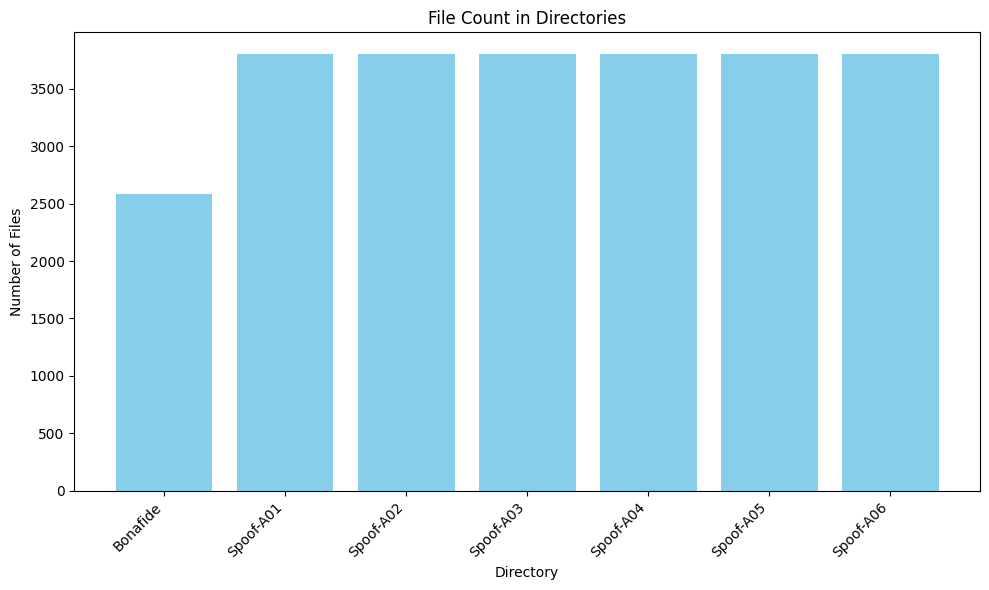

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the paths for each directory
directories = {
    'Bonafide': '/content/drive/MyDrive/LA_Dataset_Final/Bonafide3',
    'Spoof-A01': '/content/drive/MyDrive/LA_Dataset_Final/Spoof3/A01',
    'Spoof-A02': '/content/drive/MyDrive/LA_Dataset_Final/Spoof3/A02',
    'Spoof-A03': '/content/drive/MyDrive/LA_Dataset_Final/Spoof3/A03',
    'Spoof-A04': '/content/drive/MyDrive/LA_Dataset_Final/Spoof3/A04',
    'Spoof-A05': '/content/drive/MyDrive/LA_Dataset_Final/Spoof3/A05',
    'Spoof-A06': '/content/drive/MyDrive/LA_Dataset_Final/Spoof3/A06',
}

# Function to count files in a directory
def count_files(directory_path):
    return sum(1 for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f)))

# Count the number of files in each directory
file_counts = {label: count_files(path) for label, path in directories.items()}

# Print the file counts
for label, count in file_counts.items():
    print(f"Number of files in {label}: {count}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(file_counts.keys(), file_counts.values(), color='skyblue')
plt.xlabel('Directory')
plt.ylabel('Number of Files')
plt.title('File Count in Directories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
